## import and spliting dataset

In [76]:
# from tensorflow.keras.datasets import mnist
# (x_train, y_train),(x_test, y_test)= mnist.load_data()

In [3]:
import numpy as np
with np.load('mnist.npz') as data:
    print(list(data.keys()))

['x_test', 'x_train', 'y_train', 'y_test']


In [5]:
with np.load('mnist.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [7]:
x_train[0].shape

(28, 28)

In [9]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [13]:
x_train[0].shape

(28, 28, 1)

In [15]:
x_train.shape

(60000, 28, 28, 1)

## scaling

In [18]:
x_train = x_train / 255
x_test = x_test / 255

## modeling and evaluation

In [25]:
k = len(set(y_test))
k

10

In [21]:
import tensorflow as tf

In [89]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train[0].shape),
    tf.keras.layers.ZeroPadding2D((1, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu'),   # padding='same'
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.ZeroPadding2D((1, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.ZeroPadding2D((1, 1)),
    tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(k, activation='softmax')
])

In [93]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d_3 (ZeroPadding2D)     │ (None, 30, 30, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_4 (ZeroPadding2D)     │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_5 (ZeroPadding2D)     │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,138 (2.63 MB)

 Trainable params: 688,138 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,850 (640.04 KB)

 Trainable params: 163,850 (640.04 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# another type of loss: 'categorical_crossentropy' (2 noron in last layer), 'binary_crossentropy' (1 noron in last layer)

In [97]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 234s 123ms/step - accuracy: 0.9107 - loss: 0.2791 - val_accuracy: 0.9864 - val_loss: 0.0382
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 237s 127ms/step - accuracy: 0.9888 - loss: 0.0356 - val_accuracy: 0.9840 - val_loss: 0.0504


## visualizing

In [99]:
import matplotlib.pyplot as plt

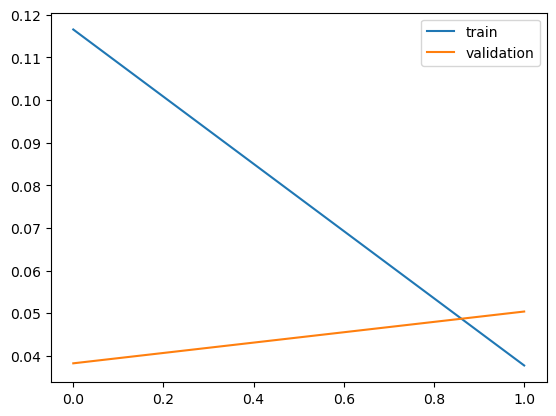

In [101]:
plt.plot(r.history['loss'], label = 'train')
plt.plot(r.history['val_loss'], label= 'validation')
plt.legend()

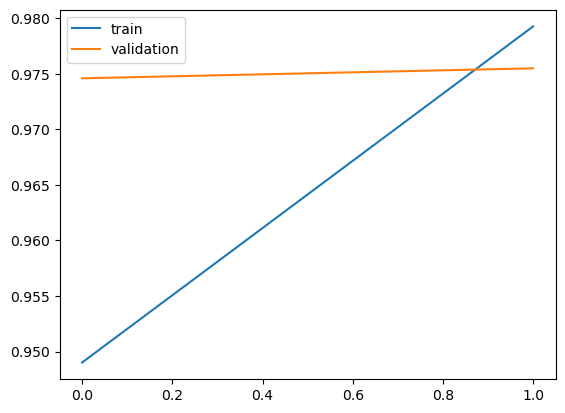

In [39]:
plt.plot(r.history['accuracy'], label = 'train')
plt.plot(r.history['val_accuracy'], label = 'validation')
plt.legend()

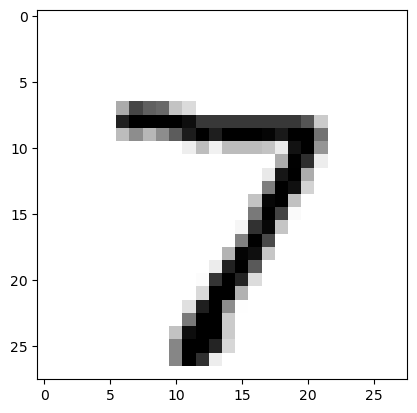

In [103]:
plt.imshow(x_test[0], cmap = 'gray_r')

In [105]:
yhat_test = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step


In [106]:
yhat_test.shape

(10000, 10)

In [107]:
yhat_test[0]

array([8.5100281e-11, 1.4912010e-06, 2.0811736e-07, 8.6094765e-08,
       5.9765650e-09, 2.9644323e-10, 1.2437397e-13, 9.9999774e-01,
       6.0598165e-10, 4.6608079e-07], dtype=float32)

In [111]:
print(y_test[0])
print(yhat_test[0].argmax())

7
7
